<a href="https://colab.research.google.com/github/PedroHudson/PUC_MVP1/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP - Análise de Dados e Boas Práticas**


**1. Definição do Problema.**

Esse projeto visa analisar a arrecadação da União Federal referente ao IPI (Imposto sobre Produtos Industrializados), no período de janeiro/2000 a março/2023. 

O IPI é um tributo federal, a competência da arrecadação é da União, que pode alterá-lo quando necessário para o controle da economia nacional.

Além do seu objetivo principal que é arrecadação, o Imposto sobre Produtos Industrializados é utilizado também como instrumento para impulsionar a competitividade dos produtos brasileiros no mercado internacional, através da redução dos custos da produção, regulando o mercado por meio de alterações de alíquotas aquecendo a economia, incentivando ou desencorajando a população a consumir itens de determinado setor.  

O imposto incide sobre produtos industrializados, sejam eles nacionais ou importados, no entanto, o percentual do imposto tem variação de acordo com a mercadoria. 

Para fins de impostos, são considerados produtos industrializados aqueles que passam por qualquer procedimento que altere a natureza do produto, bem como seu funcionamento, acabamento e apresentação. Além disso, o imposto ainda se aplica a finalidade do produto e ao seu aperfeiçoamento para fins de consumo.

A análise do projeto será centrada em 3 categorias do imposto, IPI - Automóveis,IPI - Bebidas e IPI - Fumo, iremos focar nos estados que compõe a região sudeste do país, que juntos geram a maior arrecadação do Tesouro Nacional.

Iremos verificar qual modalidade teve a maior arrecadação, em qual período, e como ocorreu a contribuição de cada estado.Faremos a preparação, limpeza e tratamento dos dados para obtermos os melhores resultados possíveis nos algoritmos de Machine Learning. Este projeto trata de um problema supervisionado, pois a partir dos dados de entrada teremos uma saída desejada.

Para isso utilizaremos os dados disponíveis do Portal de Dados Abertos do Governo Federal.  

**2. Importação das Bibliotecas e Configurações para não receber Warnings, para realização de Transformações Númericas e Categóricas.**

In [1]:
# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importação de pacotes Matplotlib
from matplotlib import cm

# Importação do Seaborn
import seaborn as sns

# Importação do MissingNo para tratamento de missings
import missingno as ms 

# Transformações Númericas

# Normalização
from sklearn.preprocessing import MinMaxScaler 

# Padronização
from sklearn.preprocessing import StandardScaler

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

**3. Importação do Dataset.**

In [2]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://www.gov.br/receitafederal/dados/arrecadacao-estado.csv?raw=true'

# carga do dataset através da url
ipi = pd.read_csv(url_dados, sep=';', encoding='ISO-8859-1',decimal=',')

**4. Análise Exploratória - Primeiras Análises.**

In [3]:
# Visualização da quantidade de instâncias e atributos do dataset
ipi.shape

(7533, 45)

In [4]:
# Visualização da quantidade de linhas por coluna
ipi.count()

Ano                                                             7533
Mês                                                             7533
UF                                                              7533
IMPOSTO SOBRE IMPORTAÇÃO                                        7533
IMPOSTO SOBRE EXPORTAÇÃO                                        7533
IPI - FUMO                                                      7533
IPI - BEBIDAS                                                   7533
IPI - AUTOMÓVEIS                                                7533
IPI - VINCULADO À IMPORTACAO                                    7533
IPI - OUTROS                                                    7533
IRPF                                                            7533
IRPJ - ENTIDADES FINANCEIRAS                                    7533
IRPJ - DEMAIS EMPRESAS                                          7533
IRRF - RENDIMENTOS DO TRABALHO                                  7533
IRRF - RENDIMENTOS DO CAPITAL     

*Observa-se que os itens que serão o foco da análise tem a mesma quantidade de linhas (IPI - Automovéis, IPI - Bebidas e IPI - Fumo).*

In [5]:
# Visualização dos tipos de dados 
ipi.dtypes

Ano                                                               int64
Mês                                                              object
UF                                                               object
IMPOSTO SOBRE IMPORTAÇÃO                                         object
IMPOSTO SOBRE EXPORTAÇÃO                                         object
IPI - FUMO                                                       object
IPI - BEBIDAS                                                    object
IPI - AUTOMÓVEIS                                                 object
IPI - VINCULADO À IMPORTACAO                                     object
IPI - OUTROS                                                     object
IRPF                                                             object
IRPJ - ENTIDADES FINANCEIRAS                                     object
IRPJ - DEMAIS EMPRESAS                                           object
IRRF - RENDIMENTOS DO TRABALHO                                  

*Com a visualização dos tipos de dados por atributo verificou-se que os itens que serão analisados estão classificados como tipo Object, portanto será necessário fazer um tratamento para a transformação dos dados em tipo Inteiro (int), permitindo assim a realização e visualização de um resumo estatístico dos atributos com valores numéricos.*

**5. Criação do Dataframe a ser analisado, primeiras visualizações de dados.**

In [6]:
# Seleção das colunas para a criação do novo dataframe
ipi_cols = ipi[['Ano', 'Mês', 'UF', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

# Criação de variável para a seleção dos Estados a serem analisados
sudeste = ['ES', 'MG', 'RJ', 'SP']

# Criação do novo dataframe 
ipi_sud = ipi_cols[ipi_cols['UF'].isin(sudeste)]


In [7]:
# Visualização da quantidade de instâncias e atributos do novo dataframe
ipi_sud.shape

(1116, 6)

In [8]:
# Visualização dos tipos de dados do novo dataframe
ipi_sud.dtypes

Ano                  int64
Mês                 object
UF                  object
IPI - FUMO          object
IPI - BEBIDAS       object
IPI - AUTOMÓVEIS    object
dtype: object

**6. Pré-processamento - Transformações dos dados.**

In [9]:
# Transformação dos dados da coluna IPI - FUMO em Inteiro(int)
ipi_sud['IPI - FUMO']=ipi_sud['IPI - FUMO'].str.replace(',','').astype(int)

In [10]:
# Transformação dos dados da coluna IPI - BEBIDAS em Inteiro(int)
ipi_sud['IPI - BEBIDAS']=ipi_sud['IPI - BEBIDAS'].str.replace(',','').astype(int)

In [11]:
# Transformação dos dados da coluna IPI - AUTOMÓVEIS em Inteiro(int)
ipi_sud['IPI - AUTOMÓVEIS']=ipi_sud['IPI - AUTOMÓVEIS'].str.replace(',','').astype(int)

In [12]:
# Visualizaçaõ dos tipos de dados apos o tratamento
ipi_sud.dtypes

Ano                  int64
Mês                 object
UF                  object
IPI - FUMO           int64
IPI - BEBIDAS        int64
IPI - AUTOMÓVEIS     int64
dtype: object

In [13]:
# Visulização das primeiras linhas do dataframe
ipi_sud.head()

,Ano,Mês,UF,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
7,2000,Janeiro,ES,3598736,20408,1503039
10,2000,Janeiro,MG,15511142,12111623,29305691
18,2000,Janeiro,RJ,24542326,30839175,4605
25,2000,Janeiro,SP,61452206,53883669,49619167
34,2000,Fevereiro,ES,3001093,136575,1664809


In [14]:
# Visualização das últimas linhas do dataframe
ipi_sud.tail()

,Ano,Mês,UF,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
7504,2023,Fevereiro,SP,201563864,3814353816,1363010272
7513,2023,Março,ES,3377,301056286,1641472175
7516,2023,Março,MG,0,294817118,0
7524,2023,Março,RJ,64486121,1902391878,3120301205
7531,2023,Março,SP,37450835,203994968,0


In [15]:
# Visualização do resumo estatístico dos atributos com valores numéricos
ipi_sud.describe()

,Ano,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
count,1116.000000,1.116000e+03,1.116000e+03,1.116000e+03
mean,2011.129032,5.951517e+08,1.411326e+09,1.115334e+09
std,6.715581,1.400818e+09,2.187951e+09,1.775882e+09
min,2000.000000,-4.329186e+08,2.040800e+04,-5.424603e+07
25%,2005.000000,3.040137e+06,2.163670e+07,1.593019e+07
50%,2011.000000,2.452370e+07,1.131052e+08,1.421687e+08
75%,2017.000000,1.678287e+08,2.115941e+09,1.615561e+09
max,2023.000000,8.766459e+09,9.945420e+09,9.967381e+09


*Com o resumo estatístico verifica-se: (1) a maior média se refere ao IPI - Bebidas; (2) o maior desvio padrão acontece também no IPI - Bebidas; (3) o valor minímo e máximo encontram-se no IPI - Automóveis; (4) verifica-se também que o IPI - Fumo e o IPI - Automóveis tiveram como valor mínimo resultado negativo, isso acontece quando ocorrem compensações e deduções maiores que a arredacadação.*

**7. Visualizações.**

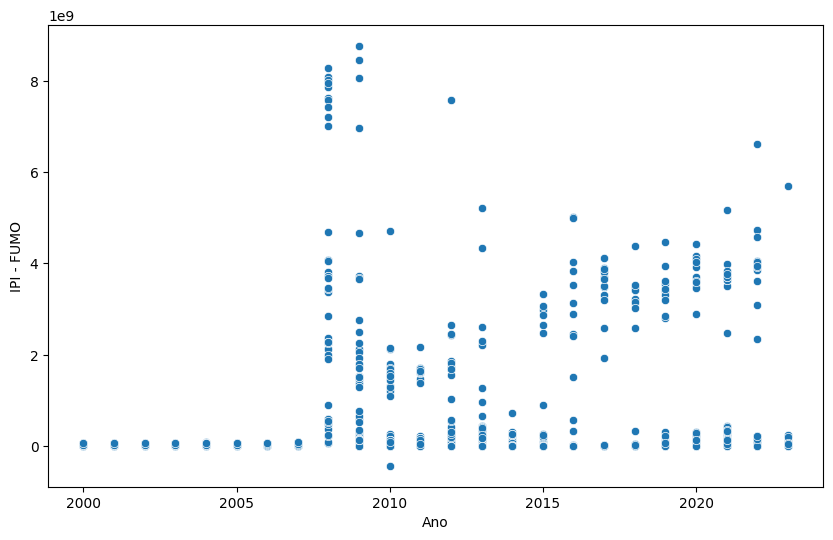

In [16]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - FUMO)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - FUMO', data=ipi_sud);

*O gráfico demonstra que houve um aumento substancial de arrecadação no período da crise financeira da economia global de 2008, em 2014 houve uma redução considerável devido a crise financeira ocorrida no Brasil, nesse ano o governo utilizou a redução da alíquota do imposto como instrumento para fomentar a economia. Nos anos seguintes houve um crescimento da arrecadação.*

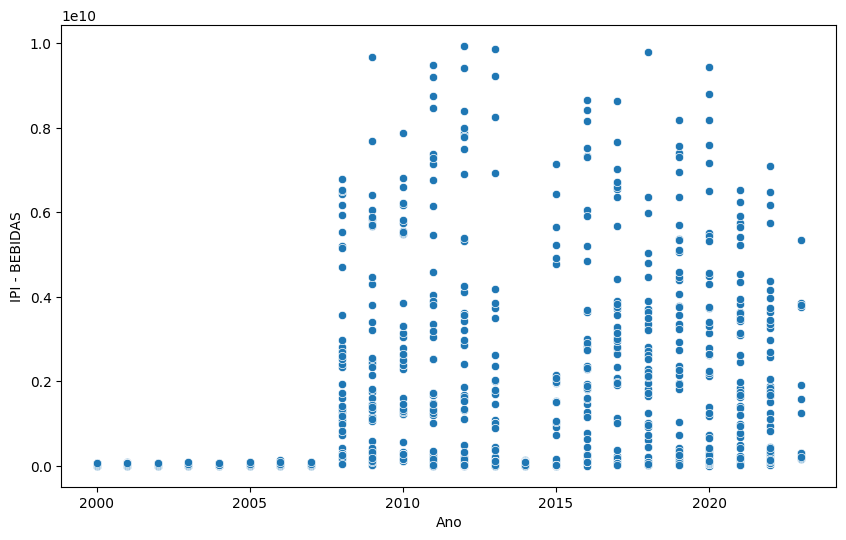

In [17]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - BEBIDAS)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - BEBIDAS', data=ipi_sud);

*Da mesma forma que o gráfico anterior, houve um aumento muito relevante na arrecadação do imposto na crise de 2008, tendência que se manteve nos demais anos, com exceção do ano de 2014, onde houve uma redução drástica devido a crise política e econômica brasileira.*

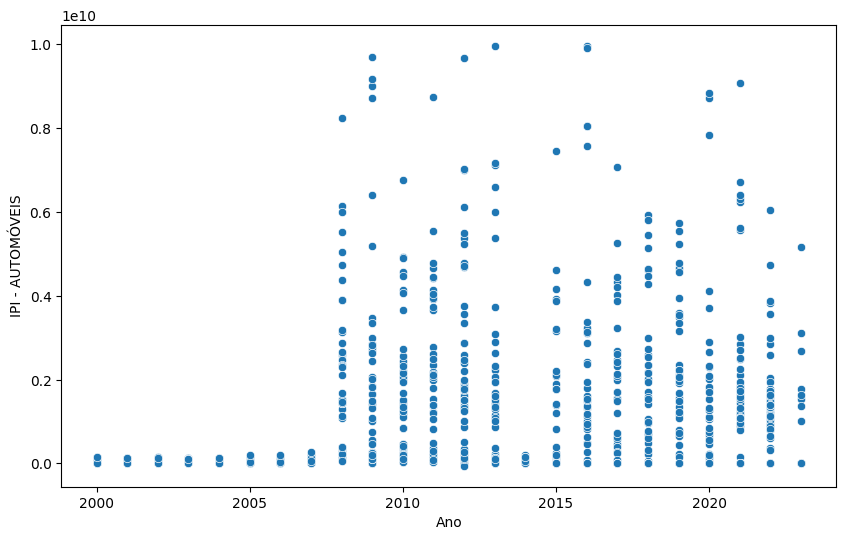

In [18]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - AUTOMÓVEIS)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - AUTOMÓVEIS', data=ipi_sud );

Seguindo a mesma rota dos impostos sobre fumo e bebidas, houve um aumento elevado de arrecadação na crise financeira mundial de 2008, e isso se manteve nos demais anos, com exceção do ano de 2014.

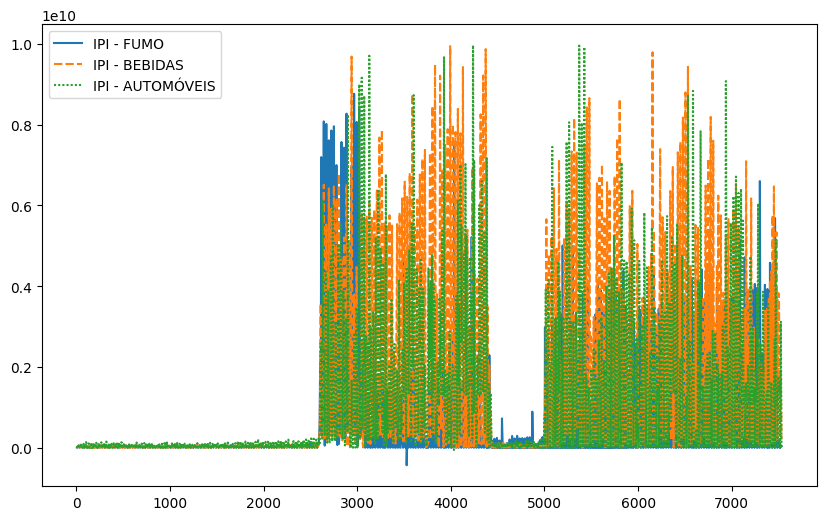

In [19]:
# Gráfico de linhas com Seaborn
plt.figure(figsize = (10,6))
sns.lineplot(data=ipi_sud.drop(['Ano'], axis=1));


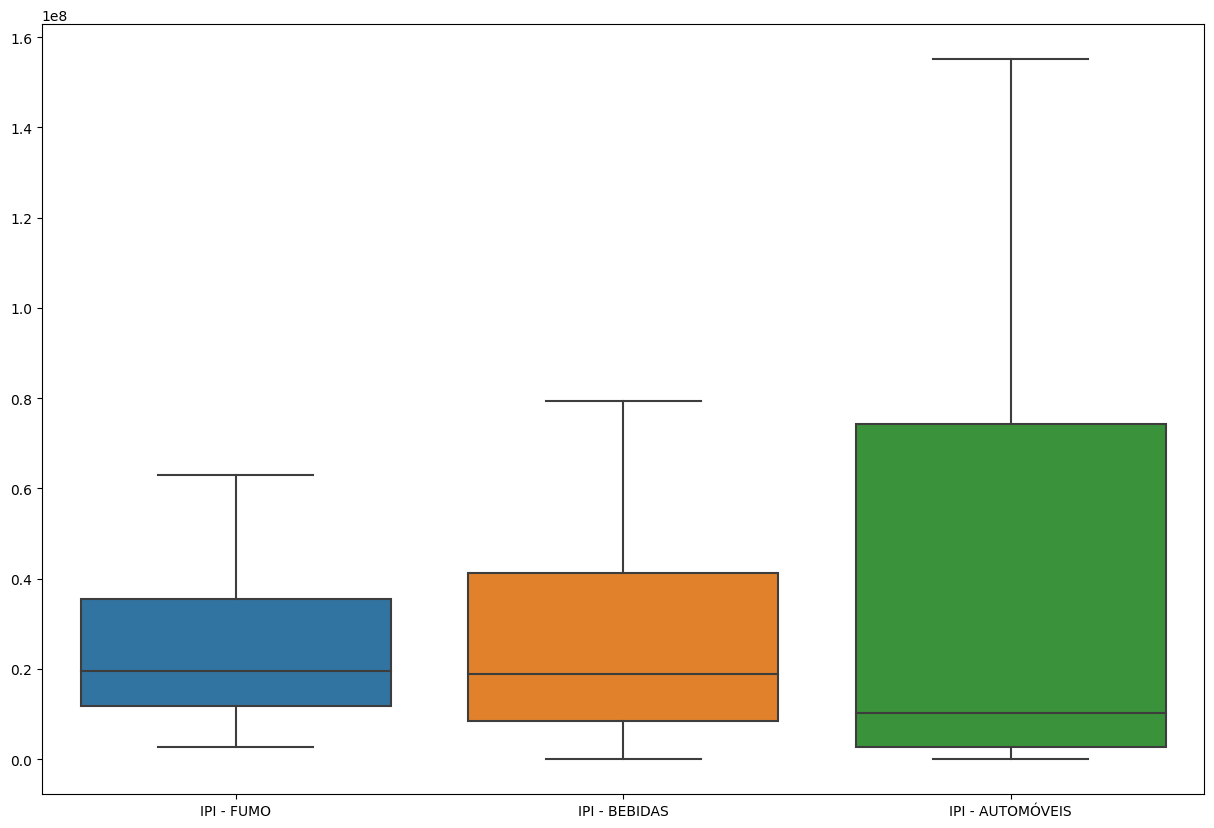

In [20]:
# Plotando boxplot com Seaborn para visualizaçãoo do resultado das primeiras 100 linhas

# Selecao de colunas para a visualização
ipi_cols1 = ipi_sud[['IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

plt.figure(figsize = (15,10))
sns.boxplot(data=ipi_cols1[1:100]);

*Verificamos através do boxplot do período que o valor máximo arrecadado ocorreu no IPI - Automóveis, que possui tambem maior média que os demais impostos. Outro aspecto a se apontar é que a mediana do IPI - Fumo e do IPI - Bebidas são similares.*

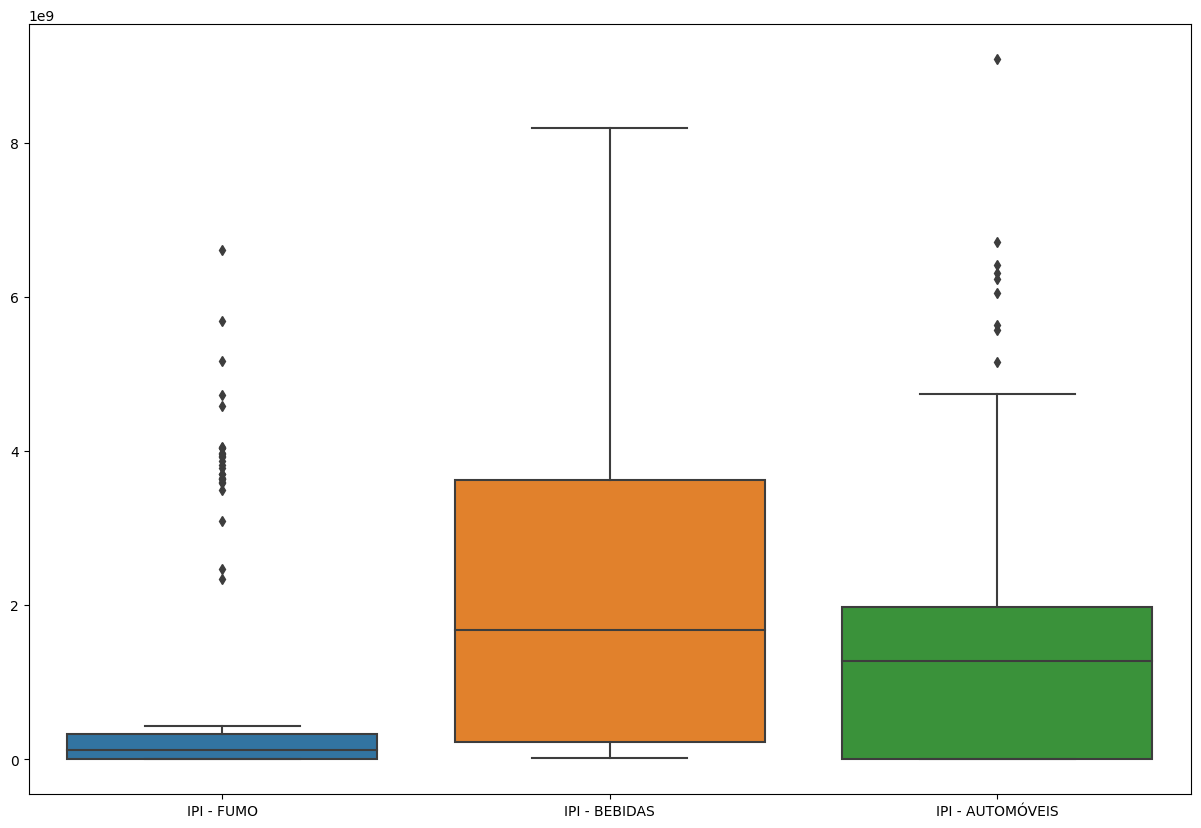

In [21]:
# Plotando boxplot com Seaborn para visualização do resultado das últimas linhas

plt.figure(figsize = (15,10))
sns.boxplot(data=ipi_cols1[1000:1116]);

*Nesse novo periodo verificamos uma redução da mediana do IPI - Fumo, e um aumento da mesma medida no IPI - Bebidas, que obteve também o maior valor. Visualizamos também que o IPI - Fumo e o IPI - Automóveis possuem possíveis outliers.*

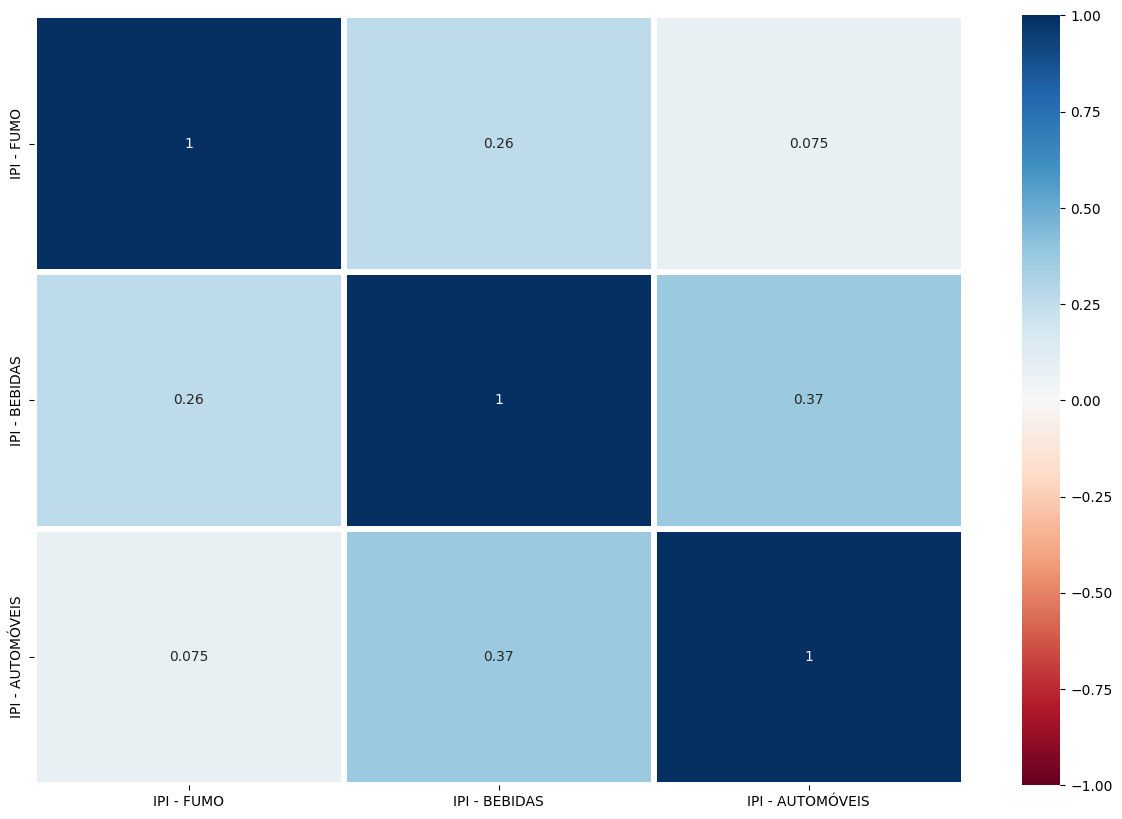

In [22]:
# Grafico de correlação com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(ipi_cols1.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');


*O gráfico indica que os impostos possuem correlações positivas, portanto uma variável tende a aumentar quando outra aumenta.*

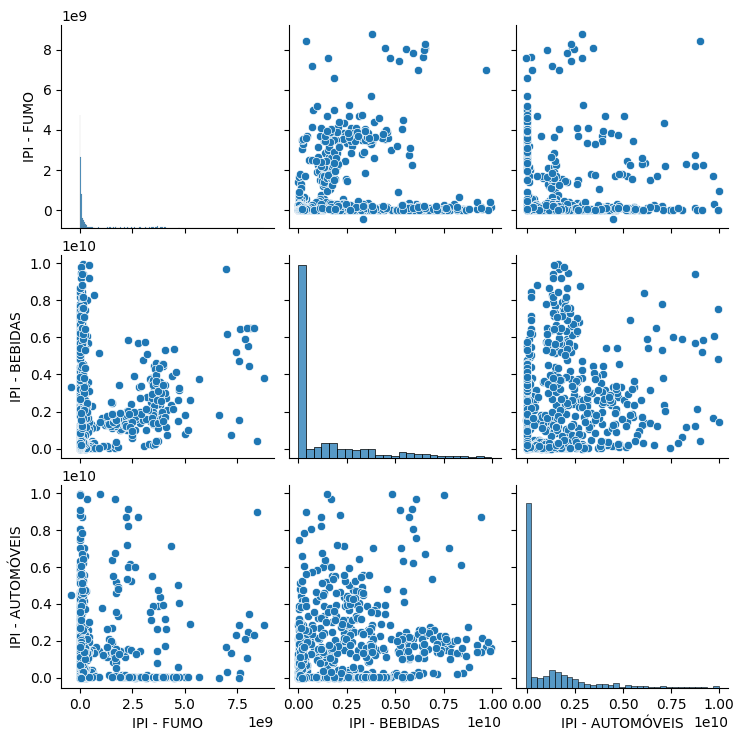

In [23]:
# Plotando Pair Plot 1 com Seaborn para visualização em uma só figura do Histograma na diagonal principal e do Scatterplot
sns.pairplot(ipi_cols1);

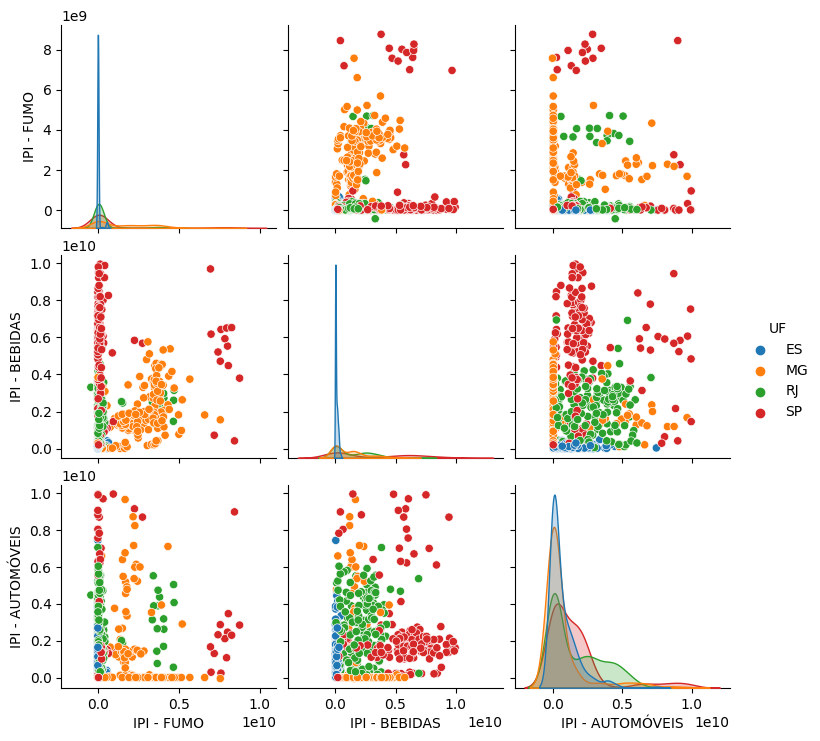

In [24]:
# Plotando Pair Plot 2 com Seaborn configurando o paramêtro hue

# Seleção de colunas para a visualização
ipi_cols2 = ipi_sud[['UF', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

sns.pairplot(ipi_cols2, hue='UF');

Com as visualizações acima verificamos que os estados que obtiveram a maior arrecadação foram São Paulo e Minas Gerais, e que existe uma correlação maior entre a arrecadação do IPI - Bebidas e o IPI - Automóveis.

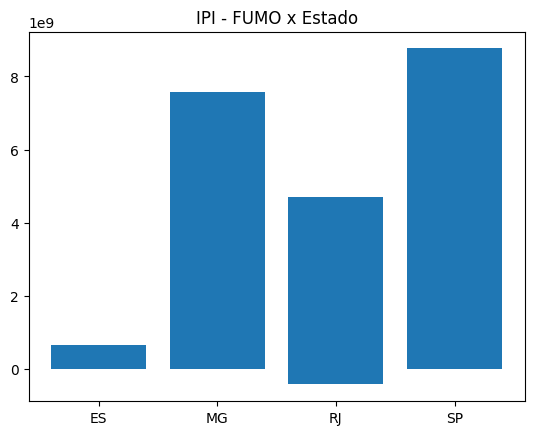

In [25]:
# Gráfico de Barras: IPI - FUMO x UF
plt.bar(ipi_cols2['UF'], ipi_cols2['IPI - FUMO'])
plt.title('IPI - FUMO x Estado');




*Verificamos que o Estado de São Paulo teve a maior arrecadação do imposto.*

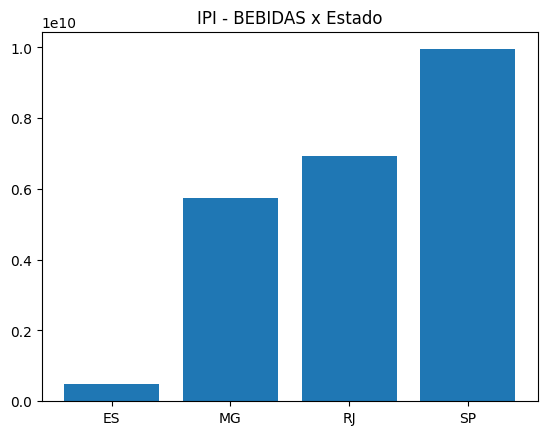

In [26]:
# Gráfico de Barras: IPI - BEBIDAS x UF
plt.bar(ipi_cols2['UF'], ipi_cols2['IPI - BEBIDAS'])
plt.title('IPI - BEBIDAS x Estado');

*Nesse grafico verificamos que Sao Paulo mantem a liderança na arrecadação, seguido pelo Rio de Janeiro.*

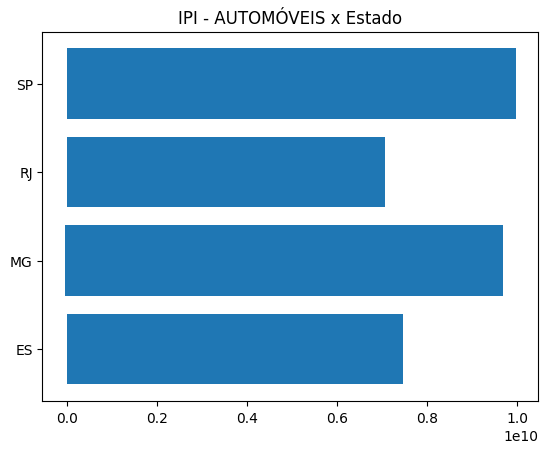

In [27]:
# Apenas para diversificar, utilizaremos o gráfico de barras horizontal para demonstrar a arrecadação do IPI - AUTOMÓVEIS x UF
plt.barh(ipi_cols2['UF'], ipi_cols2['IPI - AUTOMÓVEIS'])
plt.title('IPI - AUTOMÓVEIS x Estado');

*O gráfico demonstra um empate técnico na arrecadação entre os estados de São Paulo e de Minas Gerais.*

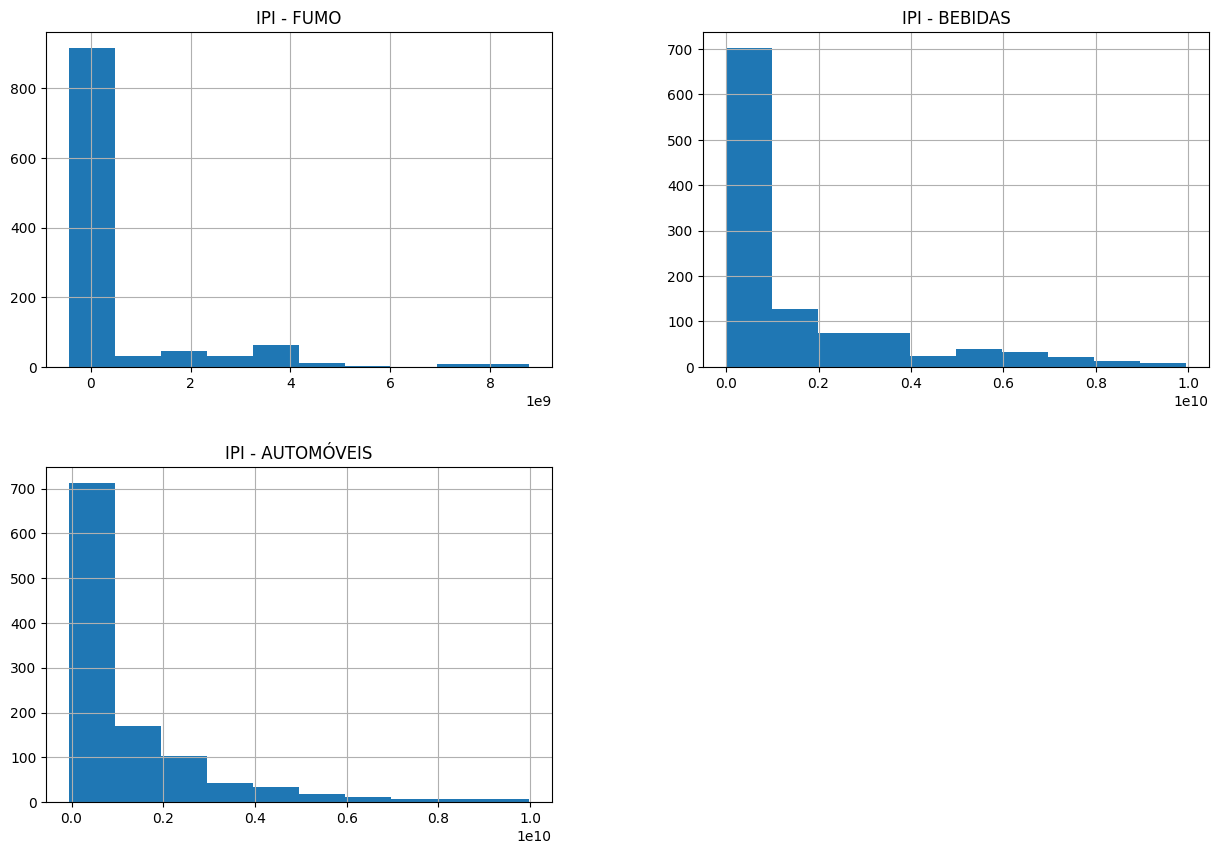

In [28]:
# Histograma 
ipi_cols2.hist(figsize = (15,10))
plt.show()

*Os gráficos demonstram a distribuição das frequências, que são assimétricas pois possuem apenas um pico.*

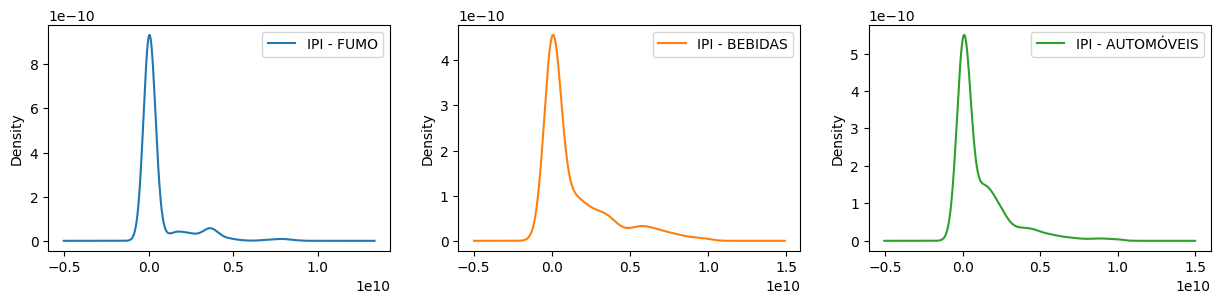

In [29]:
# Density Plot
ipi_cols2.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

*Assim como os histogramas, os gráficos de densidade demonstram que os 3 impostos possuem picos.*

**8. Pré-processamento - Tratamento de Missings.**

In [30]:
# Tratamento de Missings

#Verificando nulls do dataset

ipi_sud.isnull().sum()

Ano                 0
Mês                 0
UF                  0
IPI - FUMO          0
IPI - BEBIDAS       0
IPI - AUTOMÓVEIS    0
dtype: int64

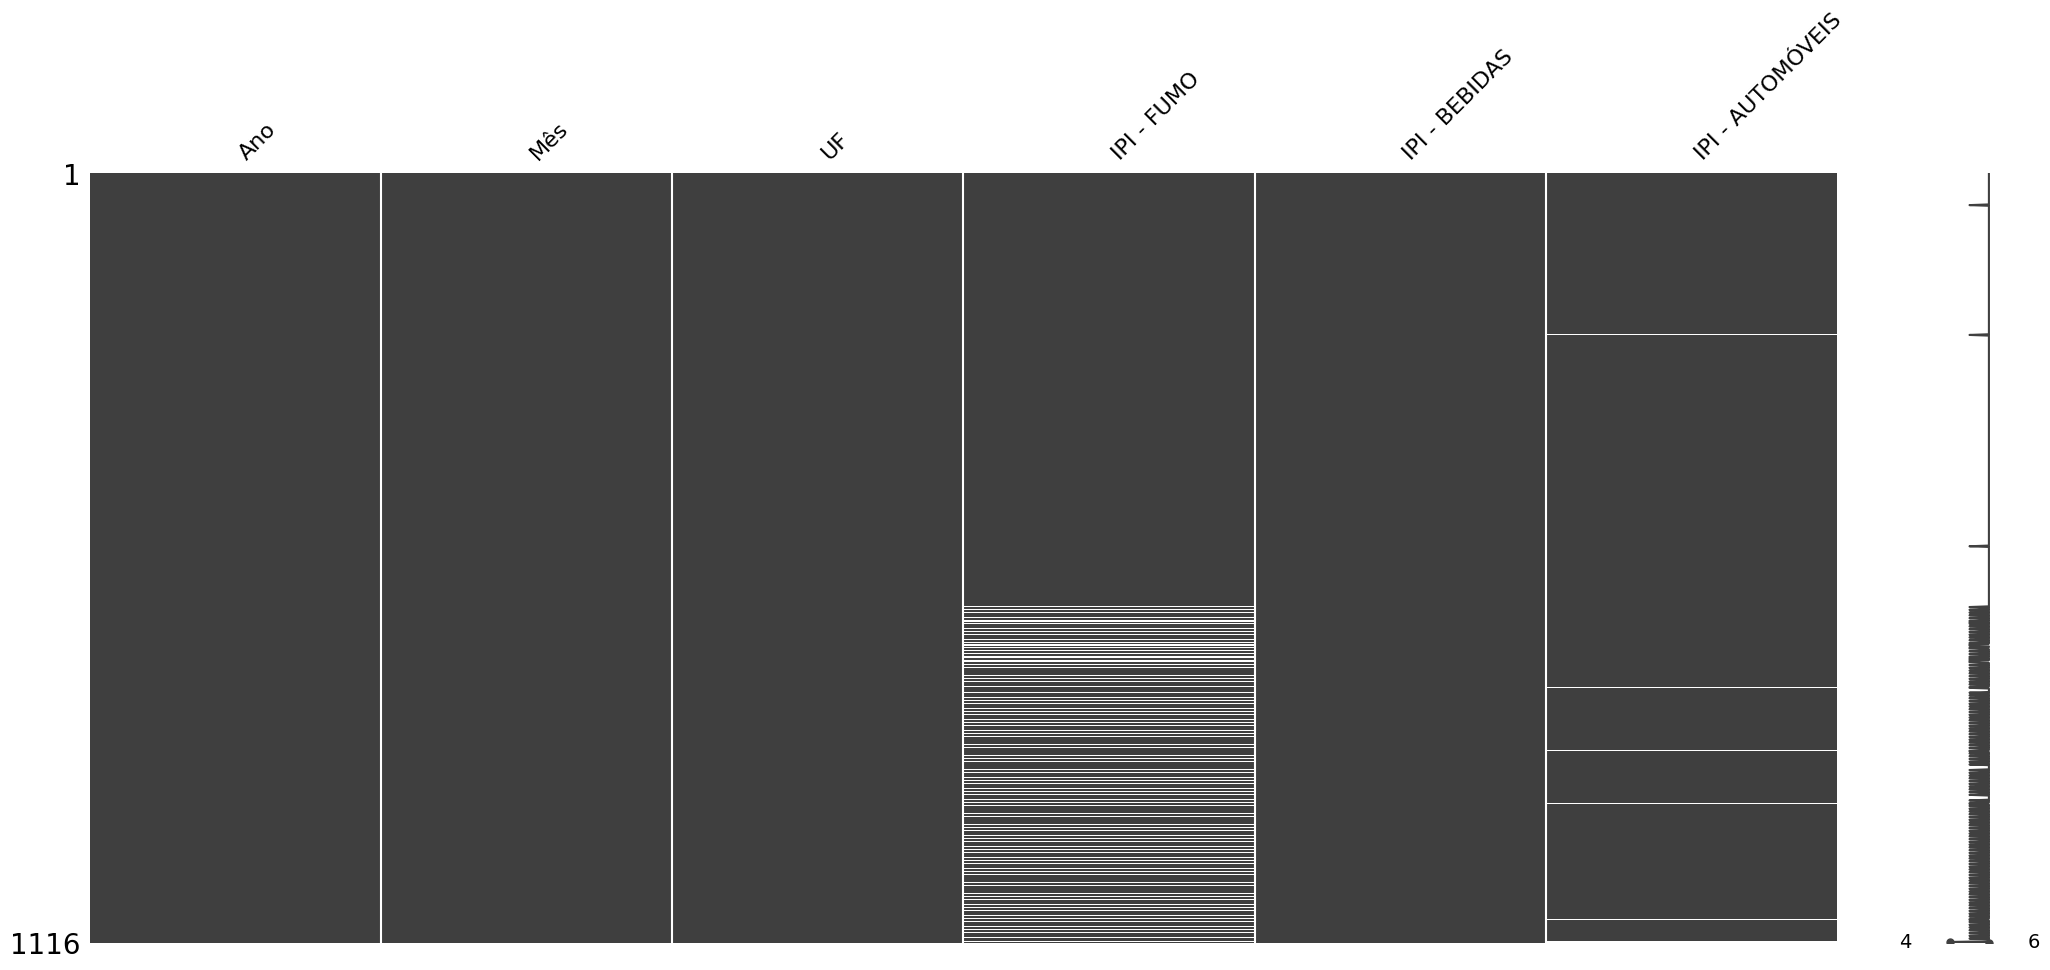

In [32]:
# Salvando um novo dataset para o tratamento de Missings

ipi_sud.replace(0, np.nan, inplace=True)

ms.matrix(ipi_sud);

*Verificamos que temos missings nos impostos IPI - Fumo e IPI - Automóveis.*

In [33]:
# Verificando novamente os nulls do dataset
ipi_sud.isnull().sum()

Ano                   0
Mês                   0
UF                    0
IPI - FUMO          127
IPI - BEBIDAS         0
IPI - AUTOMÓVEIS      8
dtype: int64

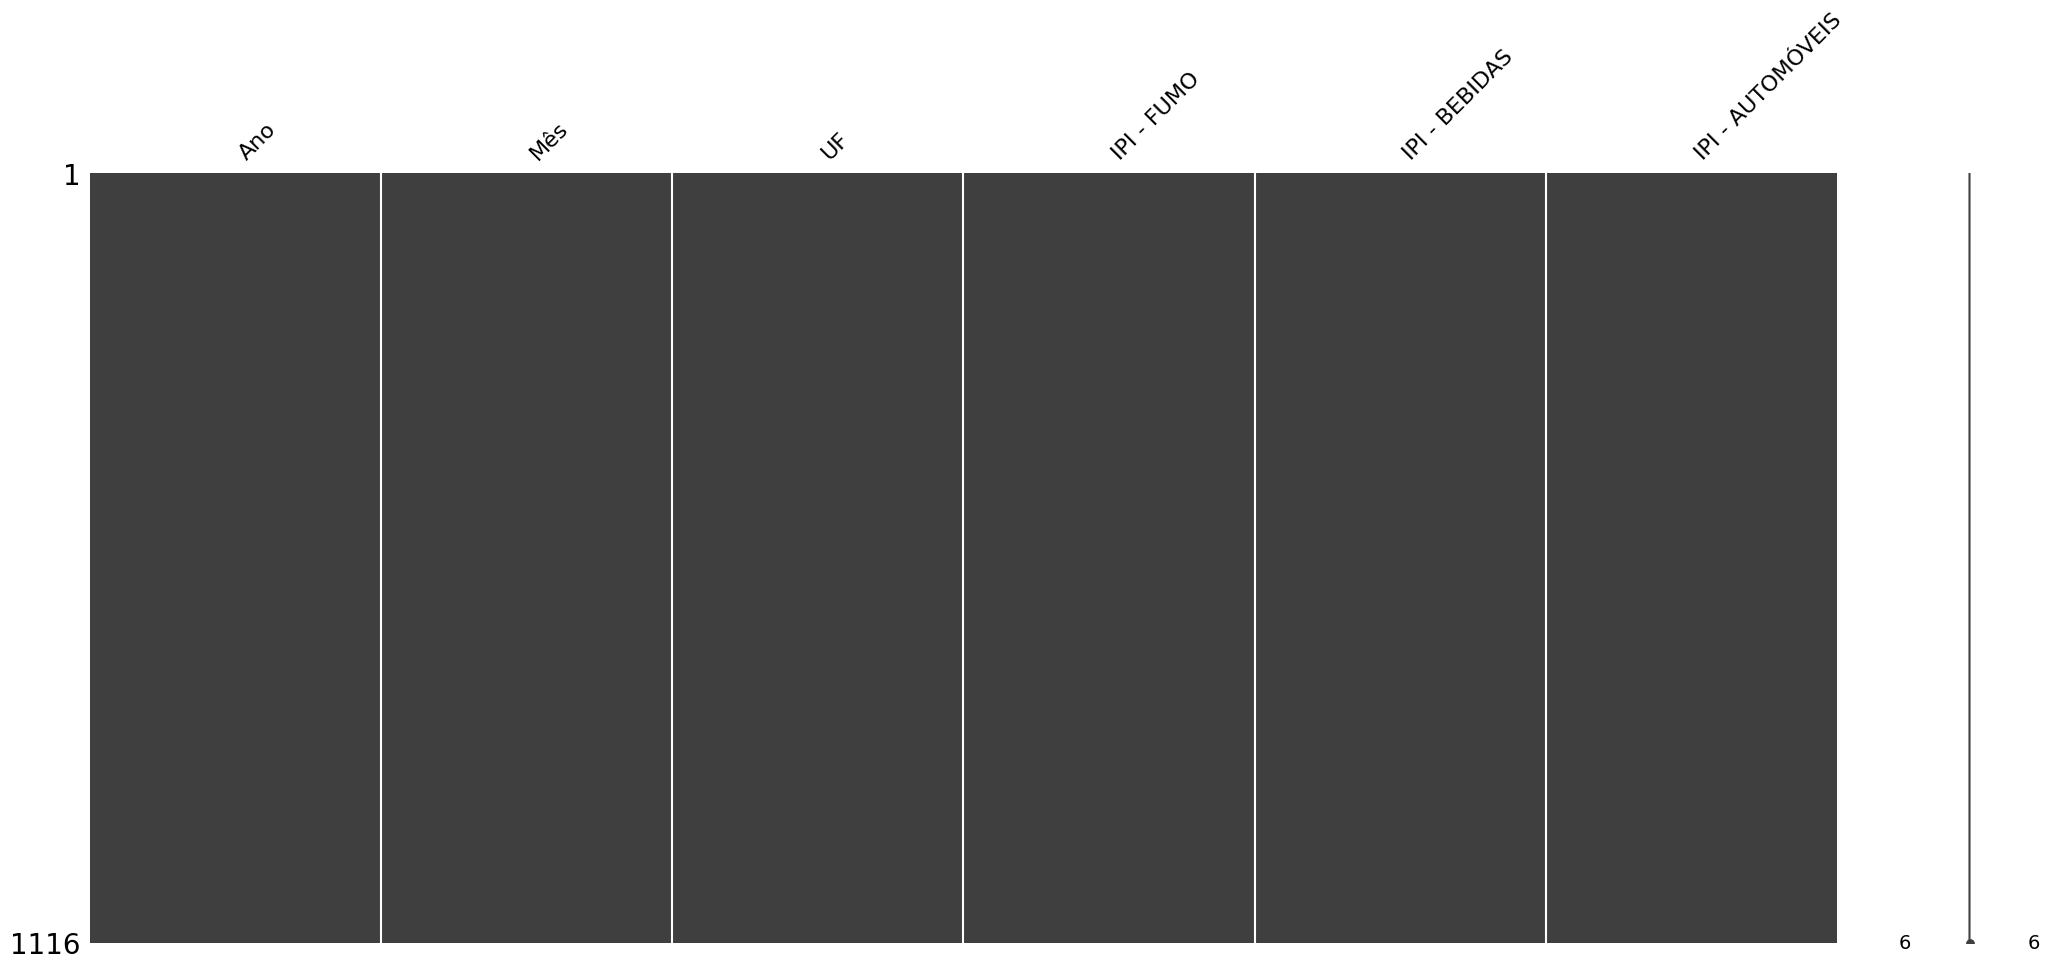

In [34]:
# Substituindo os NaN pela mediana
ipi_sud['IPI - FUMO'].fillna(ipi_sud['IPI - BEBIDAS'].median(), inplace=True)
ipi_sud['IPI - AUTOMÓVEIS'].fillna(ipi_sud['IPI - AUTOMÓVEIS'].median(), inplace=True)

ms.matrix(ipi_sud);

*Após o tratamento os missings foram substituídos pela mediana.*

In [35]:
# Nulls do dataset apos o tratamento
ipi_sud.isnull().sum()

Ano                 0
Mês                 0
UF                  0
IPI - FUMO          0
IPI - BEBIDAS       0
IPI - AUTOMÓVEIS    0
dtype: int64

**9. Pré-processamento para Machine Learning - Normalização, Padronização e Tranformação Categórica.**

In [36]:
# Separando os valores do dataset em componentes de input(x) e output(y)

X = ipi_sud.values[:,3:5]
Y = ipi_sud.values[:,5]
                

In [37]:
# Normalizando os dados

rescaledX=MinMaxScaler().fit_transform(X)

# Exibindos os dados formatados
print(rescaledX)

[[0.04745075 0.        ]
 [0.04874566 0.00121576]
 [0.04972738 0.0030988 ]
 ...
 [0.05935443 0.02964151]
 [0.05406939 0.19128155]
 [0.05113057 0.02050944]]


In [38]:
# Padronização dos dados

rescaledX=StandardScaler().fit_transform(X)

# Exibindo os dados formatados

print(rescaledX)

[[-0.43322594 -0.64532449]
 [-0.42468763 -0.63979574]
 [-0.41821446 -0.6312325 ]
 ...
 [-0.35473628 -0.51052767]
 [-0.38958442  0.22454146]
 [-0.40896218 -0.55205641]]


In [39]:
# Separando o array em componentes de input e output

X = ipi_sud.values[:,0:2]
Y = ipi_sud.values[:,2]

encodedX = OrdinalEncoder().fit_transform(X)

print(encodedX)

[[ 0.  4.]
 [ 0.  4.]
 [ 0.  4.]
 ...
 [23.  8.]
 [23.  8.]
 [23.  8.]]


In [40]:
# One-hot Encoding

# One-hot Encoding para os atributos X

encoded_X = OneHotEncoder(sparse=False).fit_transform(X)

print(encoded_X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**10. Dashboards contruídos através do Power BI.**

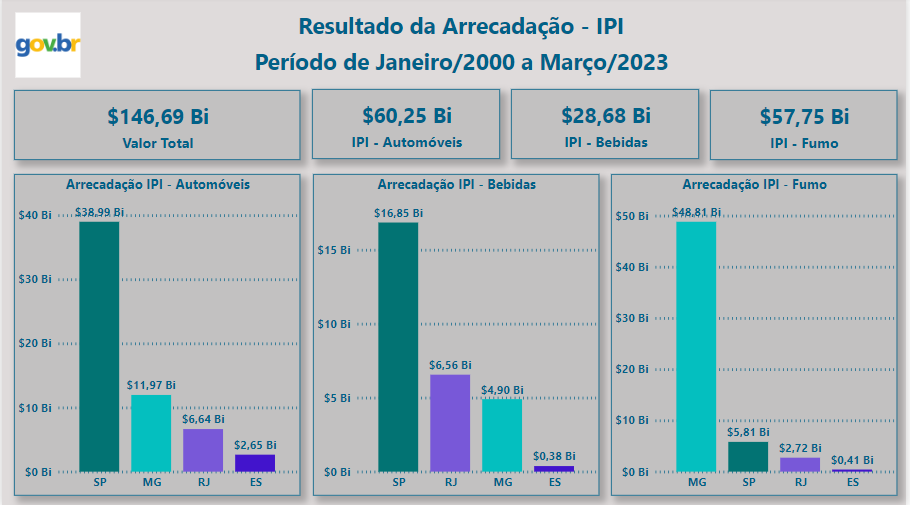

*O dashboard demonstra os valores totais arrecadados por categoria de imposto e a composição da arrecadação de cada imposto por estado. Podemos verificar que a maior arrecadação ocorreu através do IPI - Automóveis e que o Estado de São Paulo lidera na arrecadação de duas categorias, IPI - Automóveis e IPI - Bebidas.*

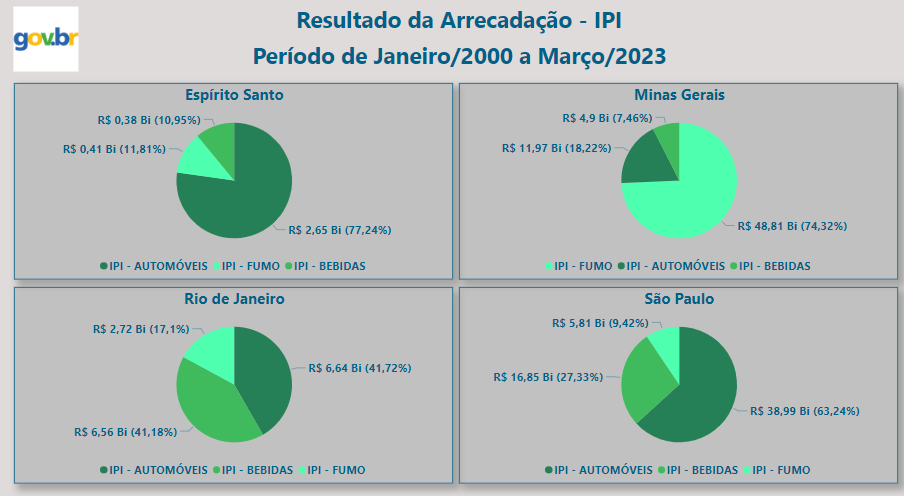

*No dashboard acima verificamos a distribuição da arrecadação por estado. É possível ver claramente que o imposto que gera a maior arrecadação no estado de Minas Gerais é o IPI - Fumo. Verificamos também que o IPI - Automovéis é o imposto com maior arrecadação nos demais estados, tendo a maior porcentagem de participação no estado do Espírito Santo.*

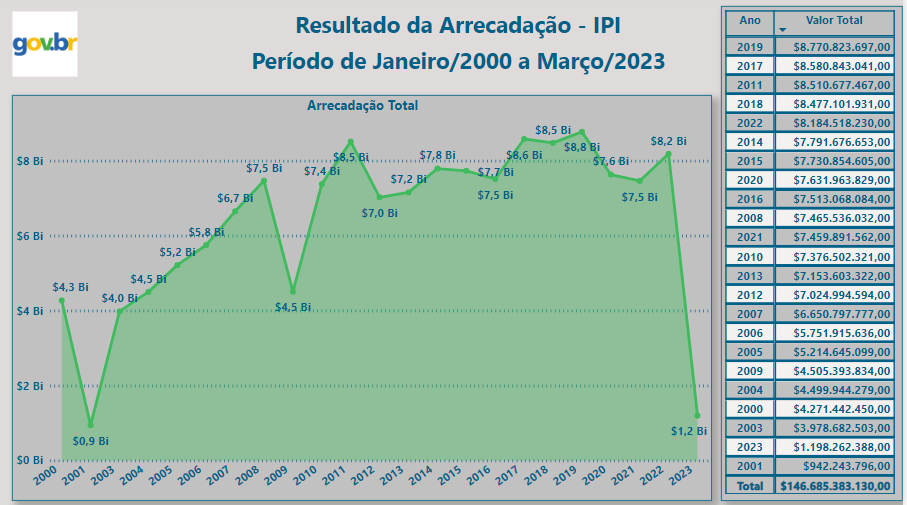

*Acima visualizamos a arrecadação através dos anos, destacam-se o ano de 2009, posterior a crise mundial de 2008, e o ano de 2019, com a maior arrecadação no período.*

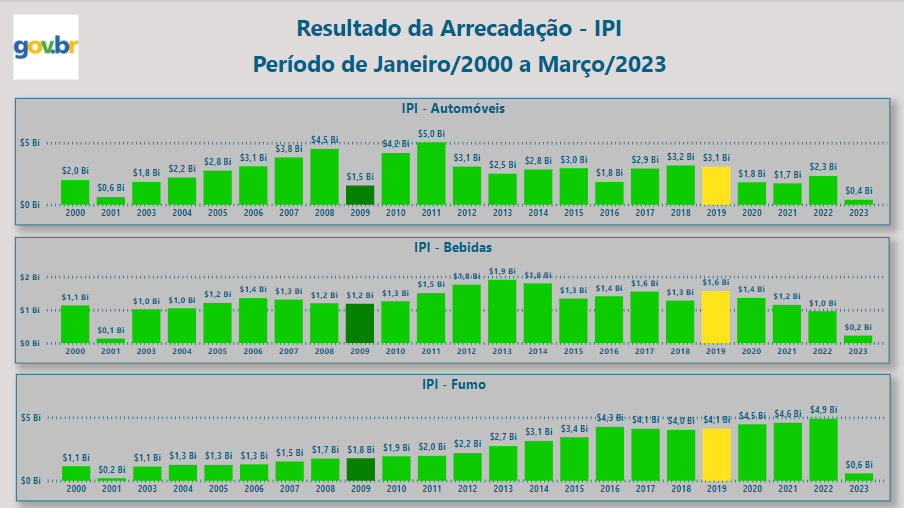

*Através dos gráficos de barras por período verificamos que o IPI - Fumo mantém o crescimento na arrecadação apesar das crises vividas no período. É possível ver também que a arrecadação que mais sofreu no ano posterior da crise de 2008 foi o IPI - Automóveis. Destacamos ainda o ano com a maior arrecadação, 2019.*

**11. Referências bibliográficas.**

 IPI - IMPOSTO SOBRE PRODUTOS INDUSTRIALIZADOS. portaltributário.com.br. Disponível em:<https://www.portaltributario.com.br/tributos/ipi.html>. Acesso em 30 de abril de 2023.

Crise de 2008 resultou em desindustrialização e crise fiscal no Brasil. https://exame.com, 2018. Disponível em: <https://exame.com/brasil/crise-de-2008-resultou-em-desindustrializacao-e-crise-fiscal-no-brasil/amp/>. Acesso em 30 de abril de 2023.

Reduções do IPI e do IOF reaquecem vendas, mas executivos mantêm cautela. https://www.uol.com.br, 2008. Disponível em: <https://www.uol.com.br/carros/ultnot/2008/12/19/ult634u3315.jhtm>. Acesso em 30 de abril de 2023.

Crise financeira de 2008: você sabe o que aconteceu?. https://www.politize.com.br/, 2020. Disponível em: <https://www.politize.com.br/crise-financeira-de-2008/>. Acesso em 30 de abril de 2023.

Crise financeira de 2007–2008. https://pt.wikipedia.org/wiki. Disponível em: <https://pt.wikipedia.org/wiki/Crise_financeira_de_2007%E2%80%932008>. Acesso em 30 de abril de 2023.

Crise econômica brasileira de 2014. https://pt.wikipedia.org/wiki. Disponível em: <https://pt.wikipedia.org/wiki/Crise_econ%C3%B4mica_brasileira_de_2014#:~:text=A%20crise%20econ%C3%B4mica%20brasileira%20de,3%2C3%25%20em%202016>. Acesso em 30 de abril de 2023.

Entenda a crise econômica. https://agenciabrasil.ebc.com.br,2016. Disponível em: <https://agenciabrasil.ebc.com.br/economia/noticia/2016-05/entenda-crise-economica>. Acesso em 30 de abril de 2023.


